<a id='top'></a>

# Granada 2019/20 Web Scraping and Pandas
### By Edd Webster
Notebook first written: 01/11/2019<br>
Notebook updated (see section 5): 12/02/2020

![title](./images/la-liga-banner-1920.jpg)

Click [here](#section4) to jump straight to the Exploratory Data Analysis section and skip the [Task Brief](#section2) and [Data Scraping](#section3) sections. Or you can click [here](#section6) to jump straight to the Conclusion.

## Introduction
This notebook is a short Exploratory Data Analysis (EDA) of xG data from the first ten games of the 2019/20 season of LaLiga, Spain's top flight football division. This notebook demonstrates how to use the BeautifulSoup Python library to scrape and analyse xG data and then features an introduction to xG analysis using [pandas](http://pandas.pydata.org/) DataFrames and [Seaborn](https://seaborn.pydata.org/) visualisations.

For more information about this notebook and the author, I'm available through all the following channels:
*    [EddWebster.com](https://www.eddwebster.com/),
*    edd.j.webster@gmail.com,
*    [@eddwebster](https://www.twitter.com/eddwebster),
*    [LinkedIn.com/in/eddwebster](https://www.linkedin.com/in/eddwebster/),
*    [GitHub/eddwebster](https://github.com/eddwebster/),
*    [Kaggle.com/eddwebster](https://www.kaggle.com/eddwebster), and
*    [HackerRank.com/eddwebster](https://www.hackerrank.com/eddwebster).

## Notebook Contents
1.    [Notebook Dependencies](#section1)<br>
2.    [Project brief](#section2)<br>
      2.1.  [Background Information](#section2.1)<br>
      2.2.  [What is xG?](#section2.2)<br>
      2.3.  [Project Hypothesis](#section2.3)<br>
3.    [Data Scraping](#section3)<br>
      3.1.  [Introduction](#section3.1)<br>
      3.2.  [Getting the Data](#section3.2)<br>
4.    [Exploratory Data Analysis (EDA)](#section4)<br>
      4.1.  [Introduction](#section4.1)<br>
      4.2.  [Reading the DataFrame](#section4.2)<br>
      4.3.  [Data Dictionary](#section4.3)<br>
      4.4.  [Initial Data Handling](#section4.4)<br>
      4.5.  [Initial Data Analysis](#section4.5)<br>
      4.6.  [Cleaning the Data](#section4.6)<br>
      4.7.  [Data Wrangling](#section4.7)<br>
      4.8.  [Plotting](#section4.8)<br>
      4.9.  [Analysis](#section4.9)<br>
5.   [Review](#section5)<br>
6.   [Summary](#section6)<br>
7.   [Next Steps](#section7)<br>
8.   [Bibliography](#section8)<br>
9.   [Further Reading](#section9)<br>

<a id='section1'></a>

## 1. Notebook Dependencies

This notebook was written using [Python 3](https://docs.python.org/3.7/) and requires the following libraries:
*    [Jupyter notebooks](https://jupyter.org/) for this interactive computational environment that the project is presented,
*    [NumPy](http://www.numpy.org/) for multidimensional array computing,
*    [pandas](http://pandas.pydata.org/) for data manipulation and ingestion, and
*    [Seaborn](https://seaborn.pydata.org/) for data visualisation, and
*    [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) and [Selenium](https://www.seleniumhq.org/) for scraping the data.

All packages used for this notebook except for BeautifulSoup can be obtained by downloading and installing the [Conda](https://anaconda.org/anaconda/conda) distribution, available on all platforms (Windows, Linux and Mac OSX). Step-by-step guides on how to install Anaconda can be found for Windows [here](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444) and Mac [here](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072), as well as in the Anaconda documentation itself [here](https://docs.anaconda.com/anaconda/install/).

In [1]:
# Import modules

# Python ≥3.5 (ideally)
import sys
assert sys.version_info >= (3, 5)

# Data preprocessing
import numpy as np
import pandas as pd
import os
import re
import random
import requests

# Web scraping
from bs4 import BeautifulSoup    # pip install BeautifulSoup
from selenium import webdriver   # pip install Selenium

# Plotting figures
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

# Display in Jupyter
from IPython.core.display import HTML
from IPython.display import Image, YouTubeVideo

# Ignore warnings
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

print("Setup Complete")

Setup Complete


<a id='section2'></a>

## 2. Project Brief

<a id='section2.1'></a>

### 2.1. Background Information
On [27th October 2019](https://www.bbc.co.uk/sport/football/50201822), the league leaders of [LaLiga](https://en.wikipedia.org/wiki/2019%E2%80%9320_La_Liga) after the first ten games of the season was not the usual suspects - Barcelona, Real Madrid or even Athletico Madrid, but it was in fact newly promoted [Granada](https://en.wikipedia.org/wiki/2019%E2%80%9320_Granada_CF_season), who were enjoying their new-found status om Spain's, top flight at the top of the pile. The Andalusian club's 1-0 victory over Real Betis took advantage of [El Clasico being postponed](https://www.bbc.co.uk/sport/football/50096390), moving up from sixth to top with 20 points from 10 games.

![title](./images/la-liga-table-bbc-27102019.png)

Granada were promoted from [The Campeonato Nacional de Liga de Segunda División](https://en.wikipedia.org/wiki/Segunda_Divisi%C3%B3n), known as LaLiga 2, in the previous season, [finishing as runners up to Osasuna with 79 points from 42 games](https://en.wikipedia.org/wiki/2018%E2%80%9319_Segunda_Divisi%C3%B3n).

According to Transfermarkt, [Granada's squad is worth £30.15m](https://www.transfermarkt.co.uk/fc-granada/startseite/verein/16795/saison_id/2019) (as of 11th November 2019), making their squad the least valueable squad in the league. Comparing this to [Real Madrid](https://www.transfermarkt.co.uk/real-madrid/startseite/verein/418/saison_id/2019) and [Barcelona](https://www.transfermarkt.co.uk/fc-barcelona/startseite/verein/131/saison_id/2019), who's squads are valued at £1.07bn and £1.06bn respectively. The value of all 20 LaLiga clubs can be found [here](https://www.transfermarkt.co.uk/laliga/startseite/wettbewerb/ES1).

Granada have never won a major trophy in their 86-year history, going closest when they lost the 1958-59 Spanish Cup final to Barcelona. Their highest LaLiga finish is sixth, on two occasions in the 1970s. This projects aims to look at whether this run is sustainable and Granada can shock pundits, much like [Leicester did in 2015/16 season](https://www.bbc.co.uk/sport/football/35988673).

<a id='section2.2'></a>

### 2.2. What is xG?
['Expected goals'](https://en.wikipedia.org/wiki/Expected_goals) or more commonly known as 'xG', is a revolutionary, new football metric, which allows you to evaluate team and player performance. In a low-scoring game such as football, final match score does not provide a clear picture of performance. More and more professional clubs and sports analytics teams are now turning to the advanced models like xG, which is a statistical measure of the quality of chances created and conceded.

As a metric, xG assesses every chance, essentially answering the question of whether a player should have scored from a certain opportunity. Put simply, it is a way of assigning a "quality" value (xG) to every attempt based on what we know about it. The higher the xG - with 1 being the maximum - the more likelihood of the opportunity being taken. So if a chance is 0.5xG, it should be scored 50% of the time.

xG was created by football data experts [Opta Sports](https://www.optasports.com/) after analysing over 300,000 shots to calculate the likelihood of an attempt being scored from a specific position on the pitch during a particular phase of play.

The factors taken into account when assessing the quality of a chance include:
*    Distance from goal
*    Angle of the shot
*    Did the chance fall at the player's feet or was it a header?
*    Was it a one on one?
*    What was the assist like? (eg long ball, cross, through ball, pull-back)
*    In what passage of play did it happen? (eg open play, direct free-kick, corner kick)
*    Has the player just beaten an opponent?
*    Is it a rebound?

The expected goals value reveals a number of things including:
*    Whether a chance really is as good as we think. While football is still a game that where debate and opinion make a huge part of the build up and analysis of matches, using xG we can now say with some certainty whether an opportunity should have been taken.
*    How many goals an individual player should be scoring from the chances their have. A striker might be top of the scoring charts, but does that necessarily mean he is the best finisher in the league? Previously we might have simply looked at their conversion rate (how many of their chances ended up as goals), but this did not provide the whole picture, as someone with a high conversion rate might just be the beneficiary of their team creating really clear-cut chances.
*    Team performance. If a team is performing above or below expectations at the start of the new season, a look at their expected goals difference could tell you whether that run is likely to last.

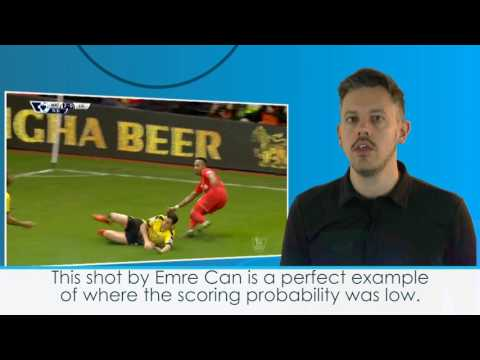

In [2]:
YouTubeVideo('w7zPZsLGK18')

<a id='section2.3'></a>

### 2.3. Project Hypothesis
In this project we will be using the xG metric to look more closely at Granada's results, looking to see if we can find any hidden trends or insights using this statistic. Have Granada scored more goals than expected? Did they create an exceptional large number of chances? Have they let in fewer goals than expected? Can this form be maintained? These are just some of the questions we will be asking as we analyse the data set.

This workbook will be split into two sections. Firstly, we'll scrape the data from Understat using [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) and [Selenium](https://www.seleniumhq.org/) Python libraries. In the second part, we'll be using the [pandas](http://pandas.pydata.org/) library to put the scrapped data into a DataFrame and then visualise this data using [Seaborn](https://seaborn.pydata.org/) for some basic plotting.

<a id='section3'></a>

## 3. Scraping the Data

<a id='section3.1'></a>

### Introduction
Complete, concise football match data is very difficult to get hold of, especially individual match data that includes xG values for play-by-play instances. Unless you're a football club, television company or another big institution that is willing to spend thousands of pounds for access to these datasets from [Opta](https://www.optasports.com/), [StatsBomb](https://statsbomb.com/), [Wyscout](https://wyscout.com/), or [Squawka](https://www.squawka.com/en/) to name but a few, you're going to have to get a bit creative!

However, thanks to [Understat](https://understat.com), we do have access to xG data for the league table and individual players.

<a id='section3.2'></a>

### Getting the Data
For the first part of this workbook, we're going to look at our data from [Understat](https://understat.com), scraping this data using [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) and [Selenium](https://www.seleniumhq.org/). For more on Webscraping best practices, see [this](https://medium.com/velotio-perspectives/web-scraping-introduction-best-practices-caveats-9cbf4acc8d0f) Medium article. Remember that you should always respect the robots.txt file when scraping!

#### Scraping with Beautiful Soup

In [3]:
# Webpage url
understat_la_liga_1920_url = 'https://understat.com/league/La_liga/2019'

# Download the webpage using requests
understat_la_liga_1920_data = requests.get(understat_la_liga_1920_url)

# Get the HTML code from the webpage
understat_la_liga_1920_html = understat_la_liga_1920_data.content

# Parse the HTML using BeautifulSoup (bs4)
soup = BeautifulSoup(understat_la_liga_1920_html, 'lxml')

In [4]:
# Print page title to see what it looks like
print(soup.title)

# Uncommenting the following line will print out the soup if you want to code for the whole webpage
# print(soup.prettify())

<title>La liga xG Table and Scorers for the 2019/2020 season | Understat.com</title>


#### Using the Selenium Webdriver
The xG table scraped from Understat is inside a JavaScript element. We therefore need to use Selenium to scrape the data.

In [5]:
# Selenium driver set up (using Chrome browser)
options = webdriver.ChromeOptions()

# Add 'headless' argument so that Selenium will run without opening a new browser window
options.add_argument('headless')

# Tell the Selenium driver to use the specified Selenium driver set up, assigned to the options variable
driver = webdriver.Chrome(options=options)

# Instruct driver to navigate to the page url
driver.get(understat_la_liga_1920_url)

# Scrap the HTML html code from the webpage
soup = BeautifulSoup(driver.page_source, 'lxml')

WebDriverException: Message: 'chromedriver' executable needs to be in PATH. Please see https://sites.google.com/a/chromium.org/chromedriver/home


Using the HTML code we've now scraped, we can navigate through it to get the information we want using the 'Inspect Element' feature in Chrome. Through the Inspector, we can identify the part of the code we need. For example, in Chrome, right-click on the ‘Team’ column in your browser and press ‘Inspect’ to pull up the HTML code for that specific part of the webpage.

![title](./images/la-liga-table-understat-inspector.png)

We can see that the ‘Team’ text is within a ‘span’ element, which in turn is inside a ‘th’ (table header) element with the class ‘sort’. We can access all the elements with this attributes throught the following code:

In [6]:
# Get the table headers using 3 chained find operations
    # 1. Find the div containing the table (div class = chemp jTable)
    # 2. Find the table within that div
    # 3. Find all 'th' elements where class = sort
headers = soup.find('div', attrs={'class':'chemp margin-top jTable'}).find('table').find_all('th',attrs={'class':'sort'})
headers

AttributeError: 'NoneType' object has no attribute 'find'

This returns a list of the HTML code for each 'th' element inside the 'chemp margin-top jTable' div. We can now iterate over the list and create a new list that just contains the text for the headers, without any extra unwanted HTML code e.g.

In [7]:
# Iterate over headers, get the text from each item, and add the results to headers_list
headers_list = []
for header in headers:
    headers_list.append(header.get_text(strip=True))
print(headers_list)

NameError: name 'headers' is not defined

Next we need to get the data from the main body of the table, e.g.

In [8]:
# You can also simply call elements like tables directly instead of using find('table') if you are only looking for the first instance of that element
body = soup.find('div', attrs={'class':'chemp margin-top jTable'}).table.tbody

# Create a master list for row data
all_rows_list = []
# For each row in the table body
for tr in body.find_all('tr'):
    # Get data from each cell in the row
    row = tr.find_all('td')
    # Create list to save current row data to
    current_row = []
    # For each item in the row variable
    for item in row:
        # Add the text data to the current_row list
        current_row.append(item.get_text(strip=True))
    # Add the current row data to the master list    
    all_rows_list.append(current_row)

# Create a pandas DataFrame where the rows = all_rows_list and columns = headers_list
df_xgleaguetable_raw = pd.DataFrame(all_rows_list, columns=headers_list)

# Rename the '№' column to 'Position' and set it to be the DataFrame's index
df_xgleaguetable_scraped.rename(columns={'№':'Position'}, inplace=True)
df_xgleaguetable_scraped = df_xgleaguetable_scraped.set_index('Position')
df_xgleaguetable_scraped

AttributeError: 'NoneType' object has no attribute 'table'

![title](./images/la-liga-dataframe-understat-27102019.png)

Finally, let's export the cleaned data table as a CSV file using the [.to_csv()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.to_csv.html) method, so that this data can be accessed outside this Jupyter notebook e.g. if you wanted to plot this data in Excel.

In [9]:
# df_xgleaguetable_scraped.to_csv(r'./data/laliga/1920/tables/laliga_xgleaguetable_1920_27102019.csv')

Now we have scraped the data and created a pandas DataFrame, we next clean it and then conduct data analysis.

<a id='section4'></a>

## 4. Exploratory Data Analysis (EDA)

<a id='section4.1'></a>

### 4.1. Introduction
In this Exploratory Data Analysis (EDA), we'll be using the [pandas](http://pandas.pydata.org/) library to use the  the scrapped data in the form a DataFrame and then using [Seaborn](https://seaborn.pydata.org/) for some basic plotting.

In our EDA, we want to identify which teams, including Granada, have an over or under-performing xG.

<a id='section4.2'></a>

### 4.2. Reading the DataFrame
First, let's read this CSV table back into a DataFrame to continue with our analysis.

**Note:** for this Jupyter notebook, we have read back into this notebook a slightly modified from the original DataFrame to also include `NPxG` (Non-penalty expected goals) and `NPxGA` (Non-penalty expected goals against). These additional columns can be seen on the Understat page league table but proved a little bit difficult to scrape using BeautifulSoup and Selenium. They have therefore been copied and pasted from the website into the CSV file as to be able to continue with our analysis. It is hoped however that the previous section provides a good explanation for web scraping for anyone new to doing so.

In [10]:
filepath_xgleaguetable = './data/laliga/1920/tables/laliga_xgleaguetable_1920_27102019.csv'
df_xgleaguetable_raw = pd.read_csv(filepath_xgleaguetable)

# Set the 'Position' column of df_xgleaguetable_raw to be the DataFrame index
df_xgleaguetable_raw = df_xgleaguetable_raw.set_index('Position')
df_xgleaguetable_raw

,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,NPxG,NPxGA
Position,,,,,,,,,,,,,
1,Granada,10,6,2,2,17,10,20,11.95-5.05,11.84+1.84,13.80-6.20,9.72,11.10
2,Barcelona,9,6,1,2,23,10,19,13.50-9.50,10.35+0.35,14.21-4.79,13.50,8.87
3,Real Sociedad,10,6,1,3,17,10,19,14.84-2.16,10.27+0.27,15.96-3.04,12.61,9.53
4,Atletico Madrid,10,5,4,1,10,5,19,14.74+4.74,7.34+2.34,19.65+0.65,13.25,6.60
5,Sevilla,10,6,1,3,13,11,19,17.50+4.50,9.00-2.00,19.68+0.68,17.50,8.26
6,Real Madrid,9,5,3,1,16,9,18,16,9.86+0.86,16.71-1.29,16.00,9.12
7,Villarreal,10,5,2,3,24,14,17,20.99-3.01,10.43-3.57,21.11+4.11,18.76,8.20
8,Osasuna,10,3,5,2,10,9,14,13.42+3.42,10.66+1.66,15.39+1.39,12.67,10.66
9,Real Valladolid,10,3,5,2,10,9,14,11.21+1.21,14.73+5.73,11.81-2.19,9.72,13.99


<a id='section4.3'></a>

### 4.3. Data Dictionary
The xG League Table has fourteen features (columns) with the following definitions and data types:

| Variable     | Data type    | Definition     |
|------|-----|-----|
| `Position`    | int64     | League position     |
| `Team`    | object     | Team name     |
| `M`    | int64     | No. matches played     |
| `W`    | int64     | No. matches won     |
| `D`    | int64     | No. matches drawn     |
| `L`    | int64     | No. matches lost     |
| `G`    | int64     | Goals (scored)     |
| `GA`    | int64     | Goals Against (conceded)     |
| `PTS`    | int64     | Points     |
| `xG`    | object     | Expected Goals     |
| `xGA`    | object     | Expected Goals Against     |
| `xPTS`    | object     | Expected Points     |
| `NPxG`    | float64     | Non-Penalty Expected Goals     |
| `NPxGA`    | float64     | Non-Penalty Expected Goals Against     |

<a id='section4.4'></a>

### 4.4. Initial Data Handling

The quality of the dataset can be checked by looking at first and last rows, using the [head()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.head.html) and [tail()](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.tail.html) methods. By default, these methods show the first and last rows of the DataFrame respectively. With arguments between the brackets, this can be changed e.g. .head(3) shows the first 3 rows.

In this example, which such a small dataset it's not really necessary to look at the first and last 5 rows. However, I've demonstrated it below for anyone new to pandas.

In [11]:
# Display the first 5 rows of the raw DataFrame, df_xgleaguetable_raw
df_xgleaguetable_raw.head()

,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,NPxG,NPxGA
Position,,,,,,,,,,,,,
1,Granada,10,6,2,2,17,10,20,11.95-5.05,11.84+1.84,13.80-6.20,9.72,11.10
2,Barcelona,9,6,1,2,23,10,19,13.50-9.50,10.35+0.35,14.21-4.79,13.50,8.87
3,Real Sociedad,10,6,1,3,17,10,19,14.84-2.16,10.27+0.27,15.96-3.04,12.61,9.53
4,Atletico Madrid,10,5,4,1,10,5,19,14.74+4.74,7.34+2.34,19.65+0.65,13.25,6.60
5,Sevilla,10,6,1,3,13,11,19,17.50+4.50,9.00-2.00,19.68+0.68,17.50,8.26


In [12]:
# Display the last 5 rows of the raw DataFrame, df_xgleaguetable_raw
df_xgleaguetable_raw.tail()

,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,NPxG,NPxGA
Position,,,,,,,,,,,,,
16,Eibar,10,2,3,5,10,15,9,8.51-1.49,15.22+0.22,8.13-0.87,7.02,14.48
17,Celta Vigo,10,2,3,5,5,12,9,11.01+6.01,12.76+0.76,11.77+2.77,9.52,12.76
18,Real Betis,10,2,3,5,12,20,9,11.72-0.28,17.76-2.24,10.42+1.42,10.97,15.53
19,Espanyol,10,2,2,6,5,15,8,8.86+3.86,12.99-2.01,10.76+2.76,8.86,12.25
20,Leganes,10,1,2,7,5,14,5,11.92+6.92,12.60-1.40,12.72+7.72,11.12,10.37


In [13]:
# Print the shape of the raw DataFrame, df_xgleaguetable_raw
print(df_xgleaguetable_raw.shape)

(20, 13)


The raw DataFrame has:
*    20 observations (rows), each observation represents one employee per week, and
*    13 attributes (columns).

In [14]:
# Features (column names) of the raw DataFrame, df_xgleaguetable_raw
df_xgleaguetable_raw.columns

Index(['Team', 'M', 'W', 'D', 'L', 'G', 'GA', 'PTS', 'xG', 'xGA', 'xPTS',
       'NPxG', 'NPxGA'],
      dtype='object')

The dataset has nineteen features (columns):
*    `Position`: League position
*    `Team`: Team name
*    `M`: No. matches played
*    `W`: No. matches won
*    `D`: No. matches drawn
*    `L`: No. matches lost
*    `G`: Goals (scored)
*    `GA`: Goals Against (conceded)
*    `PTS`: Points
*    `xG`: Expected Goals
*    `xGA`: Expected Goals Against
*    `xPTS`: Expected Points
*    `NPxG`: Non-penalty Expected Goals
*    `NPxGA`: Non-penalty Expected Goals Against

The [dtypes](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.dtypes.html) method returns the data types of each attribute in the DataFrame.

In [15]:
# dtypes of the features of the raw DataFrame, df_xgleaguetable
df_xgleaguetable_raw.dtypes

Team      object
M          int64
W          int64
D          int64
L          int64
G          int64
GA         int64
PTS        int64
xG        object
xGA       object
xPTS      object
NPxG     float64
NPxGA    float64
dtype: object

The [info](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.info.html) method to get a quick description of the data, in particular the total number of rows, and each attribute’s type and number of non-null values.

In [16]:
# Info for the raw DataFrame, df_xgleaguetable
df_xgleaguetable_raw.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 1 to 20
Data columns (total 13 columns):
Team     20 non-null object
M        20 non-null int64
W        20 non-null int64
D        20 non-null int64
L        20 non-null int64
G        20 non-null int64
GA       20 non-null int64
PTS      20 non-null int64
xG       20 non-null object
xGA      20 non-null object
xPTS     20 non-null object
NPxG     20 non-null float64
NPxGA    20 non-null float64
dtypes: float64(2), int64(7), object(4)
memory usage: 2.2+ KB


The [describe](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.describe.html) method to show some useful statistics for each numerical column in the DataFrame.

In [17]:
# Description of the raw DataFrame, df_xgleaguetable_raw, showing some summary statistics for each numberical column in the DataFrame
df_xgleaguetable_raw.describe()

,M,W,D,L,G,GA,PTS,NPxG,NPxGA
count,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.000000,20.00000,20.000000
mean,9.900000,3.600000,2.700000,3.600000,11.900000,11.900000,13.500000,11.54550,11.547000
std,0.307794,1.602629,1.301821,1.759186,5.447356,3.447348,4.501462,3.13382,3.067655
min,9.000000,1.000000,1.000000,1.000000,5.000000,5.000000,5.000000,7.02000,6.600000
25%,10.000000,2.750000,2.000000,2.000000,8.000000,9.750000,9.750000,9.41750,9.427500
50%,10.000000,3.000000,2.500000,3.000000,10.000000,12.000000,13.000000,11.04500,10.880000
75%,10.000000,5.000000,4.000000,5.000000,14.500000,14.000000,18.250000,12.81500,13.067500
max,10.000000,6.000000,5.000000,7.000000,24.000000,20.000000,20.000000,18.76000,18.470000


<a id='section4.5'></a>

### 4.5. Initial Data Analysis
To conduct some initial analysis, we'll filter and summarise the data using more specific queries regarding Goals Scored and Goals Conceded:

In [18]:
# Show the data for Granada (note that 'is equal to' is written as '==' instead of '=')
# The code below essentially reads as 'show the df_xgleaguetable_raw DataFrame where the 'Team' column is equal to 'Barcelona'
# Because Granada  is a string, you need to write it using either single or double quotes
df_xgleaguetable_raw[df_xgleaguetable_raw['Team'] == 'Granada']

,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,NPxG,NPxGA
Position,,,,,,,,,,,,,
1,Granada,10,6,2,2,17,10,20,11.95-5.05,11.84+1.84,13.80-6.20,9.72,11.1


Let's take a closer look at the teams that scored 15 or more goals i.e. the High Scorers.

In [19]:
# Filter the teams where goals scored is greater than or equal to 15, and save the result in a new DataFrame, df_high_scorers
df_high_scorers = df_xgleaguetable_raw[df_xgleaguetable_raw['G'] >= 15]
df_high_scorers.sort_values(by=['G'], inplace=True, ascending=False)
df_high_scorers

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,NPxG,NPxGA
Position,,,,,,,,,,,,,
7,Villarreal,10,5,2,3,24,14,17,20.99-3.01,10.43-3.57,21.11+4.11,18.76,8.20
2,Barcelona,9,6,1,2,23,10,19,13.50-9.50,10.35+0.35,14.21-4.79,13.50,8.87
1,Granada,10,6,2,2,17,10,20,11.95-5.05,11.84+1.84,13.80-6.20,9.72,11.10
3,Real Sociedad,10,6,1,3,17,10,19,14.84-2.16,10.27+0.27,15.96-3.04,12.61,9.53
6,Real Madrid,9,5,3,1,16,9,18,16,9.86+0.86,16.71-1.29,16.00,9.12


The data shows the Granada are in 4th position when in comes to Goals Scored, behind Villarreal, Barcelona, and Real Sociedad.

Let's now take a closer look at the teams that conceded 15 or less goals i.e. the Tightest Defence.

In [20]:
# Filter the rows where goals against is less than or equal to 10, and save the result in a new DataFrame, df_tightest
df_tightest_defence = df_xgleaguetable_raw[df_xgleaguetable_raw['GA'] <= 10]
df_tightest_defence.sort_values(by=['GA'], inplace=True, ascending=True)
df_tightest_defence

/Users/eddwebster/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,NPxG,NPxGA
Position,,,,,,,,,,,,,
4,Atletico Madrid,10,5,4,1,10,5,19,14.74+4.74,7.34+2.34,19.65+0.65,13.25,6.60
10,Athletic Club,10,3,4,3,8,7,13,9.71+1.71,11.37+4.37,12.93-0.07,7.48,10.63
6,Real Madrid,9,5,3,1,16,9,18,16,9.86+0.86,16.71-1.29,16.00,9.12
8,Osasuna,10,3,5,2,10,9,14,13.42+3.42,10.66+1.66,15.39+1.39,12.67,10.66
9,Real Valladolid,10,3,5,2,10,9,14,11.21+1.21,14.73+5.73,11.81-2.19,9.72,13.99
1,Granada,10,6,2,2,17,10,20,11.95-5.05,11.84+1.84,13.80-6.20,9.72,11.10
2,Barcelona,9,6,1,2,23,10,19,13.50-9.50,10.35+0.35,14.21-4.79,13.50,8.87
3,Real Sociedad,10,6,1,3,17,10,19,14.84-2.16,10.27+0.27,15.96-3.04,12.61,9.53


The data shows that Granada are in 8th position when it comes to Goals Conceded.

On balance it appears that Granada have a good mix of scoring goals and not letting too many in. They aren't however the best performer in either department.

Next let's clean the data so that we can use the `xG` (Expected Goals), `xGA` (Expected Goals Against) and `xPTS` (Expected Points) columns for further analysis.

<a id='section4.6'></a>

### 4.6. Cleaning the Data
Next, we need to remove the unwanted text from the `xG` (Expected Goals), `xGA` (Expected Goals Against) and `xPTS` (Expected Points) columns and convert these string values to numeric values. You can see each value in the column is followed by a plus or minus symbol, followed by another value. This value is the calculated difference between the xG, xGA and xPTS and their corresponding G, GA and PTS. We can calculate this difference between actual and expected goals/points in a seperate column.

In [21]:
# Cleaned up xG League table
df_xgleaguetable_raw['xG'] = df_xgleaguetable_raw['xG'].str.split(r'([+-])', expand=True)
df_xgleaguetable_raw['xGA'] = df_xgleaguetable_raw['xGA'].str.split(r'([+-])', expand=True)
df_xgleaguetable_raw['xPTS'] = df_xgleaguetable_raw['xPTS'].str.split(r'([+-])', expand=True)
df_xgleaguetable_raw

,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,NPxG,NPxGA
Position,,,,,,,,,,,,,
1,Granada,10,6,2,2,17,10,20,11.95,11.84,13.80,9.72,11.10
2,Barcelona,9,6,1,2,23,10,19,13.50,10.35,14.21,13.50,8.87
3,Real Sociedad,10,6,1,3,17,10,19,14.84,10.27,15.96,12.61,9.53
4,Atletico Madrid,10,5,4,1,10,5,19,14.74,7.34,19.65,13.25,6.60
5,Sevilla,10,6,1,3,13,11,19,17.50,9.00,19.68,17.50,8.26
6,Real Madrid,9,5,3,1,16,9,18,16,9.86,16.71,16.00,9.12
7,Villarreal,10,5,2,3,24,14,17,20.99,10.43,21.11,18.76,8.20
8,Osasuna,10,3,5,2,10,9,14,13.42,10.66,15.39,12.67,10.66
9,Real Valladolid,10,3,5,2,10,9,14,11.21,14.73,11.81,9.72,13.99


Let's next convert the xG (Expected Goals), xGA (Expected Goals Against) and xPTS (Expected Points) columns a from string values to numeric values. 

In [22]:
df_xgleaguetable_raw["xG"] = pd.to_numeric(df_xgleaguetable_raw["xG"])
df_xgleaguetable_raw["xGA"] = pd.to_numeric(df_xgleaguetable_raw["xGA"])
df_xgleaguetable_raw["xPTS"] = pd.to_numeric(df_xgleaguetable_raw["xPTS"])
df_xgleaguetable_raw["NPxGA"] = pd.to_numeric(df_xgleaguetable_raw["NPxGA"])

df_xgleaguetable_raw

,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,NPxG,NPxGA
Position,,,,,,,,,,,,,
1,Granada,10,6,2,2,17,10,20,11.95,11.84,13.80,9.72,11.10
2,Barcelona,9,6,1,2,23,10,19,13.50,10.35,14.21,13.50,8.87
3,Real Sociedad,10,6,1,3,17,10,19,14.84,10.27,15.96,12.61,9.53
4,Atletico Madrid,10,5,4,1,10,5,19,14.74,7.34,19.65,13.25,6.60
5,Sevilla,10,6,1,3,13,11,19,17.50,9.00,19.68,17.50,8.26
6,Real Madrid,9,5,3,1,16,9,18,16.00,9.86,16.71,16.00,9.12
7,Villarreal,10,5,2,3,24,14,17,20.99,10.43,21.11,18.76,8.20
8,Osasuna,10,3,5,2,10,9,14,13.42,10.66,15.39,12.67,10.66
9,Real Valladolid,10,3,5,2,10,9,14,11.21,14.73,11.81,9.72,13.99


In [23]:
df_xgleaguetable_raw.dtypes

Team      object
M          int64
W          int64
D          int64
L          int64
G          int64
GA         int64
PTS        int64
xG       float64
xGA      float64
xPTS     float64
NPxG     float64
NPxGA    float64
dtype: object

We can now see that all numerical columns are either floats or integers. Only `Team` is a object, which is correct as this is the only string field.

<a id='section4.7'></a>

### 4.7. Data Wrangling
We want to add extra columns to the league table DataFrame. These include:
*    Goal Difference (`GD`),
*    Expected Goal Difference (`xGD`), and
*    Non-Penalty Expected Goal Difference (`NPxGD`)

Once we add these new columns, we next want to sort the data by NPxGD to see how the final position of the league table related to a team's non-penalty expected goal difference.

In [24]:
# Add new columns for goal difference, expected goal difference and non-penalty expected goal difference
df_xgleaguetable_raw['GD'] = df_xgleaguetable_raw['G'] - df_xgleaguetable_raw['GA']
df_xgleaguetable_raw['xGD'] = df_xgleaguetable_raw['xG'] - df_xgleaguetable_raw['xGA']
df_xgleaguetable_raw['NPxGD'] = df_xgleaguetable_raw['NPxG'] - df_xgleaguetable_raw['NPxGA']

Now that we have cleaned and wrangled our DataFrame and added the missing columns, let's assign this final dataset to a new DataFrame, `df_xgleaguetable`.

In [25]:
# Assign the new, cleaned and wrangled table to a new DataFrame, df_xgleaguetable
df_xgleaguetable = df_xgleaguetable_raw

Let's next order the teams by NPxGD to help give an idea of who the good and bad teams are currently.

In [26]:
# Order the teams by NPxGD to help give an idea of who the good and bad teams are currently
df_xgleaguetable.sort_values(by=['NPxGD'], inplace=True, ascending=False)

# Add rank position of teams by NPxGD values (becomes useful when table with no index is longer than a few values)
df_xgleaguetable['NPxGD Rank'] = df_xgleaguetable['NPxGD'].rank(ascending=False)

# Subtract the NPxGD from Position to calculate the variance
# df_xgleaguetable['Diff NPxGD Rank & Position'] = df_xgleaguetable['NPxGD Rank'] - df_xgleaguetable['Position']

df_xgleaguetable

,Team,M,W,D,L,G,GA,PTS,xG,xGA,xPTS,NPxG,NPxGA,GD,xGD,NPxGD,NPxGD Rank
Position,,,,,,,,,,,,,,,,,
7,Villarreal,10,5,2,3,24,14,17,20.99,10.43,21.11,18.76,8.20,10,10.56,10.56,1.0
5,Sevilla,10,6,1,3,13,11,19,17.50,9.00,19.68,17.50,8.26,2,8.50,9.24,2.0
6,Real Madrid,9,5,3,1,16,9,18,16.00,9.86,16.71,16.00,9.12,7,6.14,6.88,3.0
4,Atletico Madrid,10,5,4,1,10,5,19,14.74,7.34,19.65,13.25,6.60,5,7.40,6.65,4.0
2,Barcelona,9,6,1,2,23,10,19,13.50,10.35,14.21,13.50,8.87,13,3.15,4.63,5.0
3,Real Sociedad,10,6,1,3,17,10,19,14.84,10.27,15.96,12.61,9.53,7,4.57,3.08,6.0
8,Osasuna,10,3,5,2,10,9,14,13.42,10.66,15.39,12.67,10.66,1,2.76,2.01,7.0
20,Leganes,10,1,2,7,5,14,5,11.92,12.60,12.72,11.12,10.37,-9,-0.68,0.75,8.0
11,Getafe,10,3,4,3,14,14,13,12.05,11.91,13.64,10.56,10.43,0,0.14,0.13,9.0


From looking at the sorted xG league table above, we can see that even though Granada have a relatively good Goal Difference (`GD`) of +7 after 10 games. However, the Expected Goal Difference (`xGD`) and the Non-Penalty Expected Goal Difference (`NPxGD`) are much lower, 0.11 and -1.38 respectively. This ranks Granada in only 10th position regarding Non-Penalty Expected Goal Difference.

Let's next plot these results to visually see the data shown in this table.

In [27]:
df_xgleaguetable = df_xgleaguetable_raw

<a id='section4.8'></a>

### 4.8. Plotting
To get a much clearer picture of what the data is telling us, it's a good idea to generate a plot or two. In this case we will create a horizontal bar plot using [Seaborn](https://seaborn.pydata.org/) to look at each team's Goal Difference (GD) vs. Expected Goal Difference (xGD):

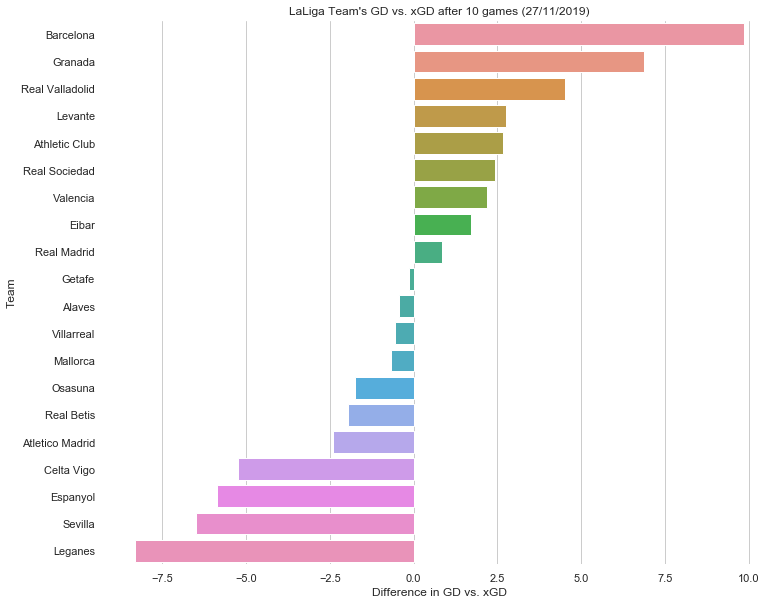

In [28]:
# Take a look at who has been overperforming or underperforming so far
df_xgleaguetable['GD_vs_xGD'] = df_xgleaguetable['GD'] - df_xgleaguetable['xGD']
df_xgleaguetable = df_xgleaguetable.sort_values(by=['Team'], ascending=False)

# Sort df_xgleaguetable DataFrame by GD_vs_xGD as opposed to team
df_xgleaguetable = df_xgleaguetable.sort_values(by=['GD_vs_xGD'], ascending=False)

# Set the width and height of the figure
plt.figure(figsize=(12,10))

# Set the plot style and colour palette
sns.set(style='whitegrid')
sns.set_color_codes('muted')

# Add title
plt.title("LaLiga Team's GD vs. xGD after 10 games (27/11/2019)")

# Bar chart showing LaLiga Team's GD vs. xGD after 10 games (27/11/2019)
sns_plot = sns.barplot(x=df_xgleaguetable['GD_vs_xGD'], y=df_xgleaguetable['Team'])

# Add labels for axes
plt.xlabel("Difference in GD vs. xGD")
plt.ylabel("Team")

# Remove the borders from the plot
sns.despine(left=True, bottom=True)

# Save plot
sns_plot = sns_plot.get_figure()
sns_plot.savefig("./figures/GD_vs_xGD_plot.png")

In [29]:
# Reset xG table order for future analysis
df_xgleaguetable = df_xgleaguetable.sort_values(by=['Position'], ascending=True)

The plot shows that when looking at `xG` and `xGA` and subsequently `xGD`, after 10 games  Granada have been significantly overperforming what they were expected to achieve, with a difference of `xG` and `xGD` of nearly 7 goals (6.89). Only Barcelona have a greater difference in `xG` and `xGD` with nearly +10 goals.

<a id='section4.9'></a>

### 4.9. Analysis
This analysis would suggest that Granada are siginificately overperforming what is expected of them and in reality, they should be somewhere more around midtable position - 10th to be specific, which for a nearly promoted team with Granada's budget, is still a very credible achievement.

It would be interesting to come back to this and review Granada's position in January or at the end of the season and see where they are in the table.

## 5. Review
A few months later after I first wrote created this workbook, I decided to come back to review Granada's progress during the winter break to see where they were in the table.

When we left Granada on 27th October 2019, they were in first position. Two days later, [Barcelona won their game-in- hand again Real Valladolid 5-1 at home](https://www.bbc.co.uk/sport/football/50229263) to return to top of the table. [Madrid also won their game-in-hand a day later](https://www.bbc.co.uk/sport/football/50243811), 5-0 against Leganes at home to climb to second position, leaving Granada in 3rd.

In their following fixture, Granada went on to [lose their next game 3-1 away at Getafe](https://www.skysports.com/football/getafe-vs-granada/415736). In the next 9 games, they went on to have a not-so good run of form, losing 6, drawing 1 and winning two (LLLDLWLLW). Their position in 3rd dropped to 6th, then 8th, then 10th, where they have been there or thereabouts for the last 5 game weeks.

Our analysis after 10 game weeks predicted that Granada had the 10th best `NPxGD`. Now, halfway through the season during the winter break, we find Granada have regressed to the mean that was suggested by the `NPxGD`, the team now lying in 10th place in the table. 

![title](./images/la-liga-table-bbc-11012020.png)

<a id='section6'></a>

## 6. Summary

Thie notebooks aims to demonstrate what is it to conduct an EDA with a new set of data using [pandas](http://pandas.pydata.org/) to create DataFrames, clean, wrangle the data, and [Seaborn](https://seaborn.pydata.org/) to plot the data. We have also seen how data that isn't otherwise available can be scraped from the internet using [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) and [Selenium](https://www.seleniumhq.org/).

We have also looked at xG data and how it can be used to assess the 'true' performance of a team when they may be over or under-performing relative as to what was expected of them. We have seen through Expected Goals that Granada made a great start to the season in the first 10 games. They were however over-performing at a rate that was inevitably not able to be maintained and by the halfway point in the season, they have regressed to the mean and now lie in 10th, exactly where their Non-Penalty Expected Goal Difference (`NPxGD`) suggested they would be.

<a id='section7'></a>

## 7. Next Steps

Look at other metrics including expected assists (xA), xGChain and xGBuildup. These metric can be standardised and combined to create metrics such as xG90, NPxG90, xA90, xG90 + xA90, NPxG90 + xA90, xGChain90, and xGBuildup90.

It would be great to look at Granada's in-game events data for further analysis of their xG and use to to build some Machine Learning models such as Random Forest. However, unfortunately it's very difficult to get hold of such data and we are limited to that that has been freely provided by the large sporting companies. Unfortunately, the 2019/20 LaLiga season is unavailable to us.

[StatsBomb](https://statsbomb.com/) however have kindly made some of their in-game event data including xG values freely available, including samples from the Women's Super League (WSL), ths US National Women's Soccer League (NWSL), the Men's FIFA World Cup, and La Liga seasons between 2004-2016. The GitHub repository for this data can be found [here](https://github.com/statsbomb/open-data) and can be accessed using [imrankhan17](https://github.com/imrankhan17/statsbomb-parser)’s. I would also recommend their [Articles](https://statsbomb.com/articles/) blog page that publishes really high quality content for anyone with an interest in Data Science and football.

With this data available, my next project will be to look at xG data from individual football matches and results during the 2014/15 season of LaLiga, the most successful season in [Barcelona's history](https://en.wikipedia.org/wiki/2014%E2%80%9315_FC_Barcelona_season) equalling the record goal difference of +89 (110 goals scored and 21 goals conceded), largely due to their formidable forward trio composed of Lionel Messi, Neymar and summer signing Luis Suárez aka the MSN. Using this data I intend to analyse Barcelona's Goal Difference against the Expected Goal Difference, to see if there are any insights as to how Barcelona achieved such a feat.

<a id='section8'></a>

## 8. Bibliography

*    [Python for Fantasy Football series by FightingLikeBeavers](http://www.fantasyfutopia.com/python-for-fantasy-football-introduction/) who's put together a great series on using Python for xG data, which was this inspiration for this project. Check out his website [FantasyFutopia.com/](http://www.fantasyfutopia.com) where he also discusses how to use apply Machine Learning models such as Random Forests to in-game data for further analysis of their xG, a project I hope to replicate soon.
*    [Python 3](https://docs.python.org/3.7/)
*    [Jupyter notebooks](https://jupyter.org/)
*    [NumPy](http://www.numpy.org/) Python library
*    [pandas](http://pandas.pydata.org/) Python library
*    [Seaborn](https://seaborn.pydata.org/) Python library
*    [BeautifulSoup](https://www.crummy.com/software/BeautifulSoup/bs4/doc/) Python library
*    [Selenium](https://www.seleniumhq.org/) Python library
*    [Conda distribution](https://anaconda.org/anaconda/conda)
*    [Windows guide to installing Conda](https://medium.com/@GalarnykMichael/install-python-on-windows-anaconda-c63c7c3d1444)
*    [Mac guide to installing Conda](https://medium.com/@GalarnykMichael/install-python-on-mac-anaconda-ccd9f2014072),
*    [Official Anaconda documentation for installing Conda](https://docs.anaconda.com/anaconda/install/).
*    [Granada went to the top of La Liga with victory over Real Betis by BBC (27/10/2019)](https://www.bbc.co.uk/sport/football/50201822)
*    [2019/20 LaLiga Wiki page](https://en.wikipedia.org/wiki/2019%E2%80%9320_La_Liga)
*    [2019/20 Granada Wiki page](https://en.wikipedia.org/wiki/2019%E2%80%9320_Granada_CF_season)
*    [El Clasico: Barcelona v Real Madrid postponed because of fears over civil unrest by BBC (18/10/2019](https://www.bbc.co.uk/sport/football/50096390)
*    [Segunda División Wiki page](https://en.wikipedia.org/wiki/Segunda_Divisi%C3%B3n)
*    [2018/19 Segunda División Wiki page](https://en.wikipedia.org/wiki/2018%E2%80%9319_Segunda_Divisi%C3%B3n)
*    [2019/20 Granada TransferMarkt page](https://www.transfermarkt.co.uk/fc-granada/startseite/verein/16795/saison_id/2019)
*    [2019/20 Real Madrid TransferMarkt page](https://www.transfermarkt.co.uk/real-madrid/startseite/verein/418/saison_id/2019)
*    [2019/20 Barcelona TransferMarkt page](https://www.transfermarkt.co.uk/fc-barcelona/startseite/verein/131/saison_id/2019)
*    [2019/20 LaLiga TransferMarkt page](https://www.transfermarkt.co.uk/laliga/startseite/wettbewerb/ES1)
*    [Leicester City win Premier League title after Tottenham draw at Chelsea by BBC (02/05/2016)](https://www.bbc.co.uk/sport/football/35988673)
*    [Expected Goals Wiki page](https://en.wikipedia.org/wiki/Expected_goals)
*    [Opta Advanced Metrics](https://www.optasports.com/services/analytics/advanced-metrics/)
*    [Opta Sports](https://www.optasports.com/)
*    [StatsBomb](https://statsbomb.com/)
*    [Wyscout](https://wyscout.com/)
*    [Squawka](https://www.squawka.com/en/)
*    [Understat](https://understat.com/). The LaLiga 2019/20 season table used specifically for this project can be found [here](https://understat.com/league/La_liga/2019).
*    [Datahub.io Spanish LaLiga data repository](https://datahub.io/sports-data/spanish-la-liga)
*    [Web Scraping: Introduction, Best Practices & Caveats by Velotio Technologies](https://medium.com/velotio-perspectives/web-scraping-introduction-best-practices-caveats-9cbf4acc8d0f)
*    [Lionel Messi scored two goals and provided two assists as Barcelona thrashed Real Valladolid 5-1 to return to the top of La Liga by BBC (29/10/2019)](https://www.bbc.co.uk/sport/football/50229263)
*    [Real Madrid moved within a point of La Liga leaders Barcelona by returning to winning ways with a routine home victory against struggling Leganes by BBC (30/10/2019)](https://www.bbc.co.uk/sport/football/50243811)
*    [Getafe 3 - Granada 1 by BBC (31/10/2019)](https://www.skysports.com/football/getafe-vs-granada/415736)
*    [StatsBomb's open data GitHub repo](https://github.com/statsbomb/open-data)
*    [imrankhan17's StatsBomb parser](https://github.com/imrankhan17/statsbomb-parser)
*    [StatsBomb Articles](https://statsbomb.com/articles/)
*    [2014/15 Barcelona Wiki page](https://en.wikipedia.org/wiki/2014%E2%80%9315_FC_Barcelona_season)

<a id='section9'></a>

## 9. Further Reading

*    [Premier League: 'Expected goals' tells us whether a player really should have scored by BBC Sport](https://www.bbc.co.uk/sport/football/40699431)
*    [Introduction to Scraping Data from Transfermarkt](https://fcpython.com/scraping/introduction-scraping-data-transfermarkt). This article explains how to use BeautifulSoup to scrape player value date from [TransferMarkt.co.ukm](https://www.transfermarkt.co.uk/)
*    [The Future of Stats: xG, xA by Tifo Football Podcast](https://www.youtube.com/watch?v=sNCeA27sDvI)
*    [What is xG? YouTube video by Tifo Football](https://www.youtube.com/watch?v=zSaeaFcm1SY)
*    [What are Expected Assists? YouTube video by Tifo Football](https://www.youtube.com/watch?v=1MdlkuzLdj4)
*    [How Data (and Some Breathtaking Soccer) Brought Liverpool to the Cusp of Glory ny New York Times](https://www.nytimes.com/2019/05/22/magazine/soccer-data-liverpool.html)
*    [No, seriously: what the heck is expected goals (xG)? by FourFourTwo](https://www.fourfourtwo.com/features/no-seriously-what-heck-expected-goals-xg)
*    [Introducing xGChain and xGBuildUp - StatsBomb](https://statsbomb.com/2018/08/introducing-xgchain-and-xgbuildup/)
*    The Expected Goals Philosophy: A Game-Changing Way of Analysing Football by James Tippett
*    The Football Code: The Science of Predicting the Beautiful Game by James Tippett
*    Football Hackers: The Science and Art of a Data Revolution  by Christoph Biermann
*    Data Analytics in Football by Daniel Memmert and Dominik Raabe
*    The Numbers Game: Why Everything You Know About Football is Wrong by Chris Anderson and David Sally
*    Soccermatics: Mathematical Adventures in the Beautiful Game by David Sumpter
*    Outside the Box: A Statistical Journey through the History of Football by Duncan Alexander

***Visit my website [EddWebster.com](https://www.eddwebster.com) or my [GitHub Repository](https://github.com/eddwebster) for more projects. If you'd like to get in contact, my email is: edd.j.webster@gmail.com.***

[Back to the top](#top)